# **Imports**

In [13]:
pip install netCDF4 as nc

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.signal import butter, lfilter, freqz, filtfilt
from scipy.stats import gaussian_kde

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load the datatsets**

In [25]:
directory = '/content/drive/My Drive/Colab Notebooks/North_Sea/'

chloro = nc.Dataset(directory + 'chl_W-E-NS_month-yr_1960-2010_interp.nc', 'r', format = "NETCDF4")
zoo = nc.Dataset(directory + 'cpr_10w10e_50n60n_month_1960-2010.nc', 'r', format = "NETCDF4")
heat_flux = nc.Dataset(directory + 'NCEP_NCAR_reanalysis_net-heat-flux_NAtl_1960-2011.nc', 'r', format = "NETCDF4")
wind = nc.Dataset(directory + 'OAflux_v3_NAtl_1960-2009_wind-speed.nc', 'r', format = "NETCDF4")
MLD = nc.Dataset(directory + 'SODA-v216_NAtl_mld_003-sigpot_1960-2010.nc', 'r', format = "NETCDF4")
SST = nc.Dataset(directory + 'SODA-v216_NAtl_sst.nc', 'r', format = "NETCDF4")
AMO = nc.Dataset(directory + 'AMO_Kaplan_noaa_Unsmooth_1960-2010.nc', 'r', format = "NETCDF4")
NAO = nc.Dataset(directory + 'NAO-CPC_1960-2010.nc', 'r', format = "NETCDF4")

In [17]:
## DATASETS KEYS AND TIME FRAMES
print("CHLORO      TIME SERIE OF LENGHT %d"%len(chloro['GTT']))
print("--> Keys :", chloro.variables.keys())
print("--> Size :", chloro['CHLN_INT'].shape)
print("--> starts in %.3f and ends in %.3f"%(chloro['GTT'][0]/12 + 1901, chloro['GTT'][-1]/12 + 1901))
print()
print("ZOOPLANKTON TIME SERIE OF LENGHT %d"%len(zoo['GTT']))
print("--> Keys :", zoo.variables.keys())
print("--> Size :", zoo['GTT'].shape)
print("--> starts in %.3f and ends in %.3f"%(zoo['GTT'][0]/12 + 1901, zoo['GTT'][-1]/12 + 1901))
print()
print("HEAT        TIME SERIE OF LENGHT %d"%len(heat_flux['TIM_MONTH']))
print("--> Keys :", heat_flux.variables.keys())
print("--> Size :", heat_flux['NET'].shape)
print("--> starts in %.3f and ends in %.3f"%(heat_flux['TIM_MONTH'][0]/12 + 1901, heat_flux['TIM_MONTH'][-1]/12 + 1901))
print()
print("WIND        TIME SERIE OF LENGHT %d"%len(wind['TIME']))
print("--> Keys :", wind.variables.keys())
print("--> Size :", wind['WND10'].shape)
print("--> starts in %.3f and ends in %.3f"%(wind['TIME'][0]/365, wind['TIME'][-1]/365))
print()
print("MLD         TIME SERIE OF LENGHT %d"%len(MLD['TIME']))
print("--> Keys :", MLD.variables.keys())
print("--> Size :", MLD['MLD'].shape)
print("--> starts in %.3f and ends in %.3f"%(MLD['TIME'][0]/365, MLD['TIME'][-1]/365))
print()
print("SST         TIME SERIE OF LENGHT %d"%len(SST['TIME']))
print("--> Keys :", SST.variables.keys())
print("--> Size :", SST['SST'].shape)
print("--> starts in %.3f and ends in %.3f"%(SST['TIME'][0]/365, SST['TIME'][-1]/365))
print()
print("AMO         TIME SERIE OF LENGHT %d"%len(AMO['TIME']))
print("--> Keys :", AMO.variables.keys())
print("--> Size :", AMO['AMO'].shape)
print("--> starts in %.3f and ends in %.3f"%(AMO['TIME'][0]/12 + 1948, AMO['TIME'][-1]/12 + 1948))
print()
print("NAO         TIME SERIE OF LENGHT %d"%len(NAO['TIME']))
print("--> Keys :", NAO.variables.keys())
print("--> Size :", NAO['INDEX'].shape)
print("--> starts in %.3f and ends in %.3f"%(NAO['TIME'][0]/12 + 1950, NAO['TIME'][-1]/12 + 1950))

CHLORO      TIME SERIE OF LENGHT 612
--> Keys : dict_keys(['GTT', 'CHLW', 'CHLE', 'CHLN', 'CHLW_INT', 'CHLE_INT', 'CHLN_INT', 'TYR_PCI', 'CHLW_YR_INT', 'CHLE_YR_INT', 'CHLN_YR_INT'])
--> Size : (612,)
--> starts in 1960.002 and ends in 2010.919

ZOOPLANKTON TIME SERIE OF LENGHT 612
--> Keys : dict_keys(['GTT', 'PCI', 'NBOBS', 'TOTCOP', 'TOTCAL', 'DIAT', 'DINO', 'TYR_PCI', 'NBOBS_SUMYR', 'PCI_YR', 'TOTCOP_YR', 'TOTCAL_YR', 'DIAT_YR', 'DINO_YR'])
--> Size : (612,)
--> starts in 1960.002 and ends in 2010.919

HEAT        TIME SERIE OF LENGHT 612
--> Keys : dict_keys(['LONN42_6', 'LAT48_84', 'LAT48_84_bnds', 'TIM_MONTH', 'NET'])
--> Size : (612, 37, 49)
--> starts in 1960.002 and ends in 2010.919

WIND        TIME SERIE OF LENGHT 600
--> Keys : dict_keys(['LONN79_10', 'LAT121_160', 'TIME', 'TIME_bnds', 'WND10'])
--> Size : (600, 40, 90)
--> starts in 1960.342 and ends in 2010.293

MLD         TIME SERIE OF LENGHT 588
--> Keys : dict_keys(['LONN179_4', 'LAT192_291', 'TIME', 'TIME_bnds', 'ML

In [18]:
## HARMONIZE THE TIME FRAMES
print("CHLORO      TIME SERIE OF NEW LENGHT %d"%len(chloro['GTT'][6:-18]))
print("--> starts in %.3f and ends in %.3f"%(chloro['GTT'][6]/12 + 1901, chloro['GTT'][-18]/12 + 1901))
print()
print("ZOOPLANKTON TIME SERIE OF NEW LENGHT %d"%len(zoo['GTT'][6:-18]))
print("--> starts in %.3f and ends in %.3f"%(zoo['GTT'][6]/12 + 1901, zoo['GTT'][-18]/12 + 1901))
print()
print("HEAT        TIME SERIE OF NEW LENGHT %d"%len(heat_flux['TIM_MONTH'][6:-18]))
print("--> starts in %.3f and ends in %.3f"%(heat_flux['TIM_MONTH'][6]/12 + 1901, heat_flux['TIM_MONTH'][-18]/12 + 1901))
print()
print("WIND        TIME SERIE OF NEW LENGHT %d"%len(wind['TIME'][:-12]))
print("--> starts in %.3f and ends in %.3f"%(wind['TIME'][0]/365, wind['TIME'][-12]/365))
print()
print("MLD         TIME SERIE OF NEW LENGHT %d"%len(MLD['TIME']))
print("--> starts in %.3f and ends in %.3f"%(MLD['TIME'][0]/365, MLD['TIME'][-1]/365))
print()
print("SST         TIME SERIE OF NEW LENGHT %d"%len(SST['TIME']))
print("--> starts in %.3f and ends in %.3f"%(SST['TIME'][0]/365, SST['TIME'][-1]/365))
print()
print("AMO         TIME SERIE OF NEW LENGHT %d"%len(AMO['TIME'][6:-18]))
print("--> starts in %.3f and ends in %.3f"%(AMO['TIME'][6]/12 + 1948, AMO['TIME'][-18]/12 + 1948))
print()
print("NAO         TIME SERIE OF NEW LENGHT %d"%len(NAO['TIME'][7:-18]))
print("--> starts in %.3f and ends in %.3f"%(NAO['TIME'][7]/12 + 1950, NAO['TIME'][-18]/12 + 1950))

CHLORO      TIME SERIE OF NEW LENGHT 588
--> starts in 1960.502 and ends in 2009.502

ZOOPLANKTON TIME SERIE OF NEW LENGHT 588
--> starts in 1960.502 and ends in 2009.502

HEAT        TIME SERIE OF NEW LENGHT 588
--> starts in 1960.502 and ends in 2009.502

WIND        TIME SERIE OF NEW LENGHT 588
--> starts in 1960.342 and ends in 2009.378

MLD         TIME SERIE OF NEW LENGHT 588
--> starts in 1960.342 and ends in 2009.293

SST         TIME SERIE OF NEW LENGHT 588
--> starts in 1960.342 and ends in 2009.293

AMO         TIME SERIE OF NEW LENGHT 588
--> starts in 1960.583 and ends in 2009.583

NAO         TIME SERIE OF NEW LENGHT 588
--> starts in 1960.583 and ends in 2009.583


# **Biological variables : Chlorophyll and Zooplankton**

In [19]:
## TIME REFERENCES
time = chloro['GTT'][6:-18]
time_years = chloro['GTT'][6:-18]/12 + 1901
dt = (time[1:] - time[:-1]).reshape(-1,1)

## MARK OUT THE SHIFT TIME FRAMES
idx1980 = np.where(np.round(time_years,1) == 1980)[0][0]
idx1981 = np.where(np.round(time_years,1) == 1981)[0][0]
idx1989 = np.where(np.round(time_years,1) == 1989)[0][0]
print("P1    = [1960;1980]      <=> Indices = [0;%d]"%idx1980)
print("P2    = [1981;2010]      <=> Indices = [%d;%d]"%(idx1981,len(time_years)-1))
print("SHIFT = [1981;1989] ⊂ P2 <=> Indices = [%d;%d]"%(idx1981,idx1989))

P1    = [1960;1980]      <=> Indices = [0;234]
P2    = [1981;2010]      <=> Indices = [246;587]
SHIFT = [1981;1989] ⊂ P2 <=> Indices = [246;342]


Text(0, 0.5, 'Cop anomalies')

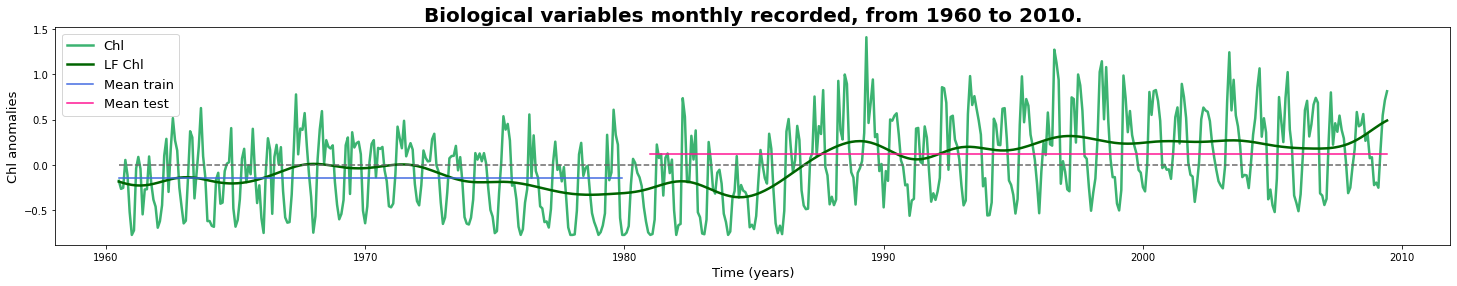

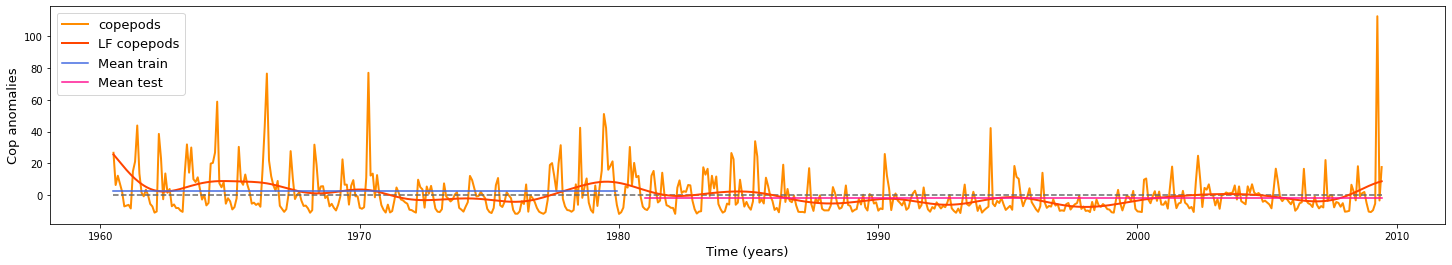

In [20]:
## LOW PASS BUTTERWORTH FILTER PARAMETERS
cutoff = 1/24
b, a = butter(3, cutoff, 'lowpass')

## BIO VARIABLE N°1 : Chl
chl = chloro['CHLN_INT'][6:-18]
chloro_anomaly = (chl - np.mean(chl)) 
chloro_anomaly_LF = filtfilt(b, a, chloro_anomaly)

## BIO VARIABLE N°2 : Copepods
cop_NS = zoo['TOTCOP'][6:-18]
cop_anomaly = (cop_NS - np.mean(cop_NS))
cop_anomaly_LF = filtfilt(b, a, cop_anomaly)

## PLOTS THE BIOLOGICAL DATA
plt.figure(figsize = (25,4))
plt.title("Biological variables monthly recorded, from 1960 to 2010.", size = 20, fontweight = 'bold')
plt.plot(time_years, chloro_anomaly, color = 'mediumseagreen', linewidth = 2.5, label = 'Chl')
plt.plot(time_years, chloro_anomaly_LF, color = 'darkgreen', linewidth = 2.5, label = 'LF Chl')
plt.plot(time_years[:idx1980], np.mean(chloro_anomaly[:idx1980])*np.ones_like(time_years[:idx1980]), color = 'royalblue', label = 'Mean train')
plt.plot(time_years[idx1981:], np.mean(chloro_anomaly[idx1981:])*np.ones_like(time_years[idx1981:]), color = 'deeppink', label = 'Mean test')
plt.plot(time_years, np.mean(chloro_anomaly)*np.ones_like(time_years),  color = 'dimgrey', linestyle = 'dashed')
plt.legend(prop = {'size':13})
plt.xlabel("Time (years)", size = 13)
plt.ylabel("Chl anomalies", size = 13)

plt.figure(figsize = (25,4))
plt.plot(time_years, cop_anomaly, color = 'darkorange', label = 'copepods', linewidth = 2)
plt.plot(time_years, np.mean(cop_anomaly)*np.ones_like(time_years), color = 'dimgrey', linestyle = 'dashed')
plt.plot(time_years, cop_anomaly_LF, color = 'orangered', label = 'LF copepods', linewidth = 2)
plt.plot(time_years[:idx1980], np.mean(cop_anomaly[:idx1980])*np.ones_like(time[:idx1980]), color = 'royalblue', label = 'Mean train')
plt.plot(time_years[idx1981:], np.mean(cop_anomaly[idx1981:])*np.ones_like(time[idx1981:]), color = 'deeppink', label = 'Mean test')
plt.legend(prop = {'size':13})
plt.xlabel("Time (years)", size = 13)
plt.ylabel("Cop anomalies", size = 13)

# **Physical variables : SST, MLD, wind, heat, NAO, AMO**

In [21]:
## 1D VARIABLES
AMO_NS = AMO['AMO'][6:-18]
NAO_NS = NAO['INDEX'][7:-18]

## 2D VARIABLES
SST_NS  = []
MLD_NS  = []
heat_NS = []
wind_NS = []
## TAKE THE MEAN
for i in range(len(SST['SST'][:])):
    SST_NS.append(np.mean(SST['SST'][i][0]))
    MLD_NS.append(np.mean(MLD['MLD'][i]))
    heat_NS.append(np.mean(heat_flux['NET'][i+6]))
    wind_NS.append(np.mean(wind['WND10'][i][0]))

In [22]:
## 2D variables
AMO_anomaly  = (AMO_NS - np.mean(AMO_NS))
NAO_anomaly  = (NAO_NS - np.mean(NAO_NS))
SST_anomaly  = (SST_NS - np.mean(SST_NS))
MLD_anomaly  = (MLD_NS - np.mean(MLD_NS))
heat_anomaly = (heat_NS - np.mean(heat_NS))
wind_anomaly = (wind_NS - np.mean(wind_NS))

AMO_anomaly_LF  = filtfilt(b, a, AMO_anomaly)
NAO_anomaly_LF  = filtfilt(b, a, NAO_anomaly)
SST_anomaly_LF  = filtfilt(b, a, SST_anomaly)
MLD_anomaly_LF  = filtfilt(b, a, MLD_anomaly)
heat_anomaly_LF = filtfilt(b, a, heat_anomaly)
wind_anomaly_LF = filtfilt(b, a, wind_anomaly)

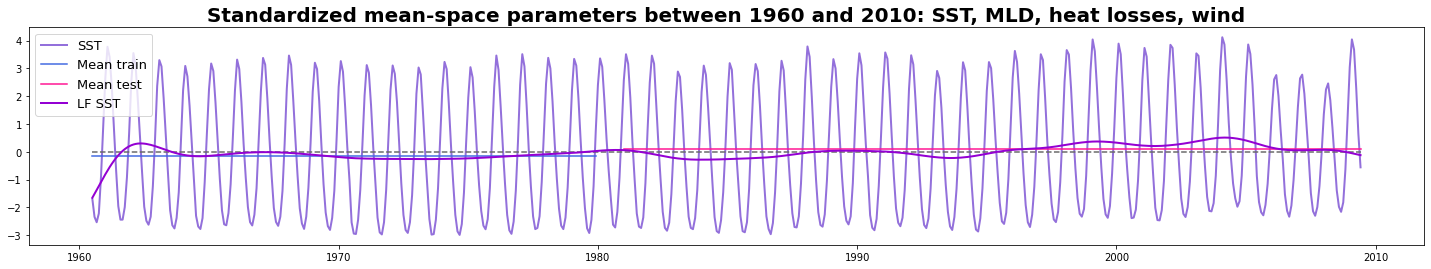

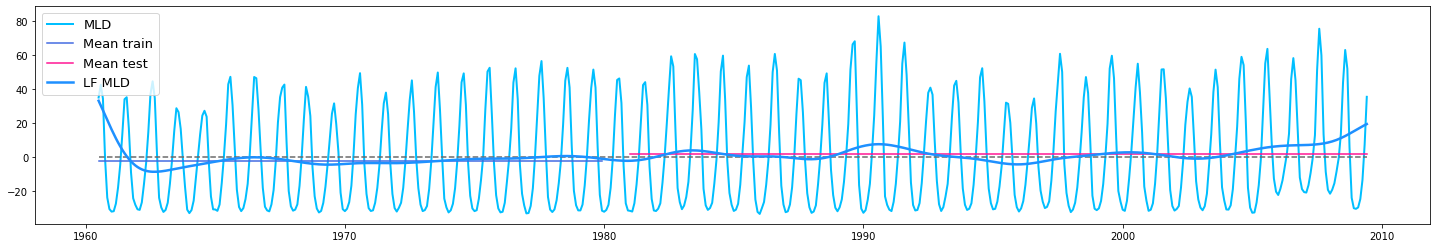

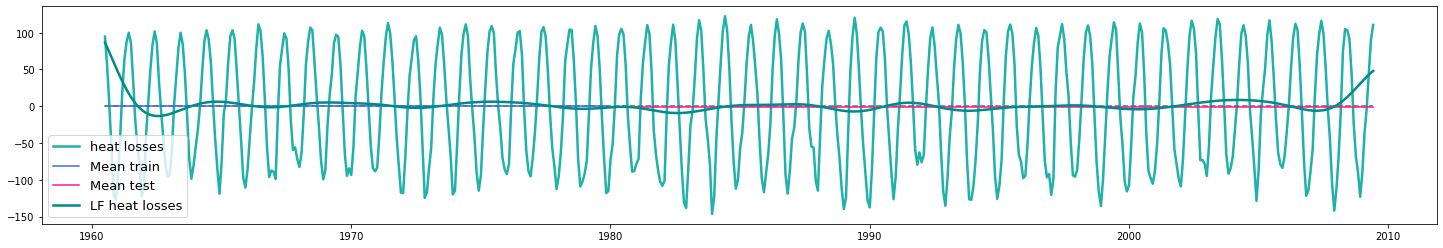

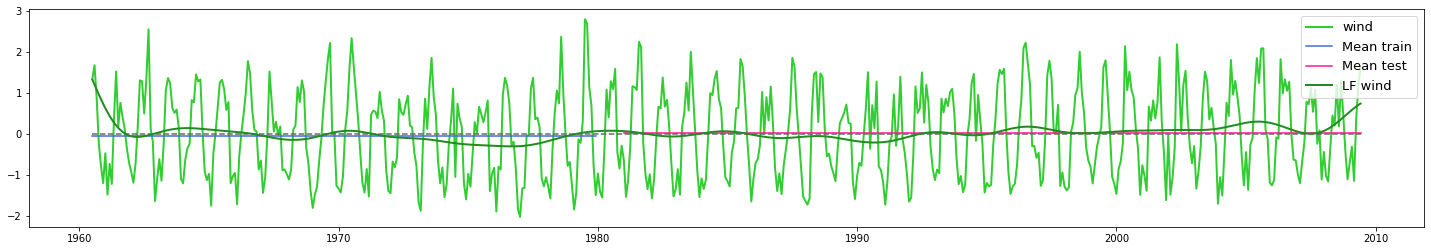

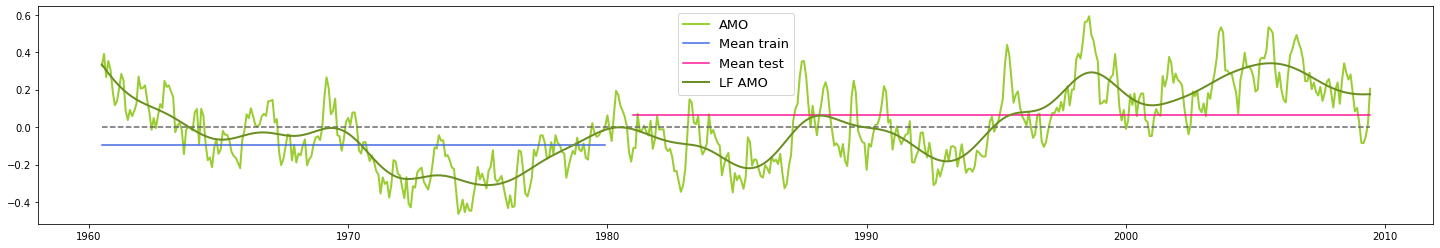

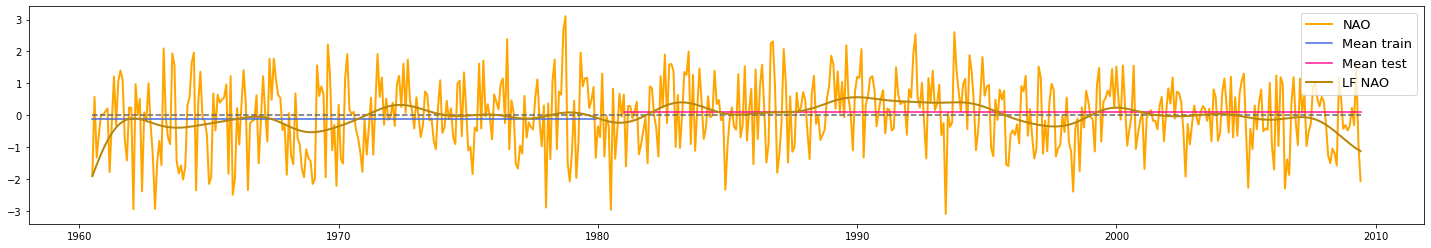

In [23]:
plt.figure(figsize = (25,4))
plt.title("Standardized mean-space parameters between 1960 and 2010: SST, MLD, heat losses, wind", size = 20, fontweight = 'bold')
plt.plot(time_years, SST_anomaly, color = 'mediumpurple', label = 'SST', linewidth = 2)
plt.plot(time_years, np.mean(SST_anomaly)*np.ones_like(time_years), color = 'dimgrey', linestyle = 'dashed')
plt.plot(time_years[:idx1980], np.mean(SST_anomaly[:idx1980])*np.ones_like(time[:idx1980]), color = 'royalblue', label = 'Mean train')
plt.plot(time_years[idx1981:], np.mean(SST_anomaly[idx1981:])*np.ones_like(time[idx1981:]), color = 'deeppink', label = 'Mean test')
plt.plot(time_years, SST_anomaly_LF, color = 'darkviolet', label = 'LF SST', linewidth = 2)
plt.legend(prop = {'size':13})
plt.figure(figsize = (25,4))
plt.plot(time_years, MLD_anomaly, color = 'deepskyblue', label = 'MLD', linewidth = 2)
plt.plot(time_years, np.mean(MLD_anomaly)*np.ones_like(time), color = 'dimgrey', linestyle = 'dashed')
plt.plot(time_years[:idx1980], np.mean(MLD_anomaly[:idx1980])*np.ones_like(time[:idx1980]), color = 'royalblue', label = 'Mean train')
plt.plot(time_years[idx1981:], np.mean(MLD_anomaly[idx1981:])*np.ones_like(time[idx1981:]), color = 'deeppink', label = 'Mean test')
plt.plot(time_years, MLD_anomaly_LF, color = 'dodgerblue', label = 'LF MLD', linewidth = 2.5)
plt.legend(prop = {'size':13})
plt.figure(figsize = (25,4))
plt.plot(time_years, heat_anomaly, color = 'lightseagreen', label = 'heat losses', linewidth = 2.5)
plt.plot(time_years, np.mean(heat_anomaly)*np.ones_like(time), color = 'dimgrey', linestyle = 'dashed')
plt.plot(time_years[:idx1980], np.mean(heat_anomaly[:idx1980])*np.ones_like(time[:idx1980]), color = 'royalblue', label = 'Mean train')
plt.plot(time_years[idx1981:], np.mean(heat_anomaly[idx1981:])*np.ones_like(time[idx1981:]), color = 'deeppink', label = 'Mean test')
plt.plot(time_years, heat_anomaly_LF, color = 'darkcyan', label = 'LF heat losses', linewidth = 2.5)
plt.legend(prop = {'size':13})
plt.figure(figsize = (25,4))
plt.plot(time_years, wind_anomaly, color = 'limegreen', label = 'wind', linewidth = 2)
plt.plot(time_years, np.mean(wind_anomaly)*np.ones_like(time), color = 'dimgrey', linestyle = 'dashed')
plt.plot(time_years[:idx1980], np.mean(wind_anomaly[:idx1980])*np.ones_like(time[:idx1980]), color = 'royalblue', label = 'Mean train')
plt.plot(time_years[idx1981:], np.mean(wind_anomaly[idx1981:])*np.ones_like(time[idx1981:]), color = 'deeppink', label = 'Mean test')
plt.plot(time_years, wind_anomaly_LF, color = 'forestgreen', label = 'LF wind', linewidth = 2)
plt.legend(prop = {'size':13})
plt.figure(figsize = (25,4))
plt.plot(time_years, AMO_anomaly, color = 'yellowgreen', label = 'AMO', linewidth = 2)
plt.plot(time_years, np.mean(AMO_anomaly)*np.ones_like(time), color = 'dimgrey', linestyle = 'dashed')
plt.plot(time_years[:idx1980], np.mean(AMO_anomaly[:idx1980])*np.ones_like(time[:idx1980]), color = 'royalblue', label = 'Mean train')
plt.plot(time_years[idx1981:], np.mean(AMO_anomaly[idx1981:])*np.ones_like(time[idx1981:]), color = 'deeppink', label = 'Mean test')
plt.plot(time_years, AMO_anomaly_LF, color = 'olivedrab', label = 'LF AMO', linewidth = 2)
plt.legend(prop = {'size':13})
plt.figure(figsize = (25,4))
plt.plot(time_years, NAO_anomaly, color = 'orange', label = 'NAO', linewidth = 2)
plt.plot(time_years, np.mean(NAO_anomaly)*np.ones_like(time), color = 'dimgrey', linestyle = 'dashed')
plt.plot(time_years[:idx1980], np.mean(NAO_anomaly[:idx1980])*np.ones_like(time[:idx1980]), color = 'royalblue', label = 'Mean train')
plt.plot(time_years[idx1981:], np.mean(NAO_anomaly[idx1981:])*np.ones_like(time[idx1981:]), color = 'deeppink', label = 'Mean test')
plt.plot(time_years, NAO_anomaly_LF, color = 'darkgoldenrod', label = 'LF NAO', linewidth = 2)
plt.legend(prop = {'size':13})

 > Regarding the **heat losses** parameter, *no clear shift is observed* in the data, between P1([1960; 1980]) and P2([1981; 2010]). Therefore, **we must retrieve it**, as it is not relevant to reconstruct the biological shift, and might be misleading for the neural network. 

# **Data standardization**

> Let us assume that **P1 is the training set**. From the perspective of performing real predictions in the future, we thus consider that P2 characteristics (including **mean** and **standard deviation**) are **unknown**. 

> We must therefore standardize the data using P1 mean and standard deviation according to the following formula:

> $data_{stand} = \frac{data - µ(data_{P1})}{σ(data_{P1})}$

> with :
> * $µ(data_{P1})$ : mean of data on P1
> * $σ(data_{P1})$ : standard deviation of data on P1





Text(0.5, 1.0, 'Chl CPR on P1 = [1960 ; 1980] and P2 = [1981 ; 2010].')

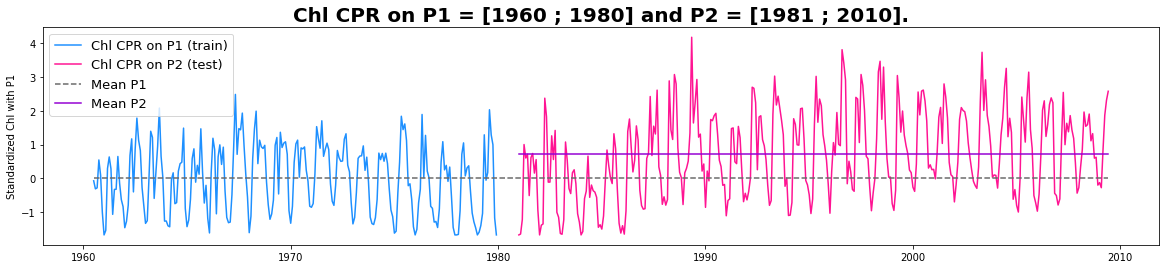

In [24]:
## NORMALIZATION USING P1 MEAN AND STD 
chloro_stand_P1 = (chl - np.mean(chl[:idx1980])) / np.std(chl[:idx1980])
cop_stand_P1    = (cop_NS - np.mean(cop_NS[:idx1980])) / np.std(cop_NS[:idx1980])

AMO_stand_P1    = (AMO_NS - np.mean(AMO_NS[:idx1980])) / np.std(AMO_NS[:idx1980])
NAO_stand_P1    = (NAO_NS - np.mean(NAO_NS[:idx1980])) / np.std(NAO_NS[:idx1980])
SST_stand_P1    = (SST_NS - np.mean(SST_NS[:idx1980])) / np.std(SST_NS[:idx1980])
MLD_stand_P1    = (MLD_NS - np.mean(MLD_NS[:idx1980])) / np.std(MLD_NS[:idx1980])
wind_stand_P1   = (wind_NS - np.mean(wind_NS[:idx1980])) / np.std(wind_NS[:idx1980])

## PLOT THE TRAIN/TEST CHL SETS
plt.figure(figsize = (20,4))
plt.plot(time_years[:idx1980], chloro_stand_P1[:idx1980], color = 'dodgerblue', label = 'Chl CPR on P1 (train)')
plt.plot(time_years[idx1981:], chloro_stand_P1[idx1981:], color = 'deeppink', label = 'Chl CPR on P2 (test)')
plt.plot(time_years, np.zeros_like(time_years), color = 'dimgrey', linestyle = 'dashed', label = 'Mean P1')
plt.plot(time_years[idx1981:], np.mean(chloro_stand_P1[idx1981:])*np.ones_like(time_years[idx1981:]), color = 'darkviolet', label = 'Mean P2')
plt.ylabel("Standardized Chl with P1")
plt.legend(prop = {'size':13}, loc = 'upper left')
plt.title('Chl CPR on P1 = [1960 ; 1980] and P2 = [1981 ; 2010].', fontweight = 'bold', size = 20)